In [ ]:
#Step 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv("Zoo.csv")

In [ ]:
# Display first few rows of the dataset
print("First 5 rows of dataset:\n", df.head())

First 5 rows of dataset:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3 

In [ ]:
# Basic info
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
# Shape and columns
print("\nShape of Dataset:", df.shape)
print("\nColumns:", df.columns)


Shape of Dataset: (101, 18)

Columns: Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
# Step 3: Data Analysis & Visualization
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


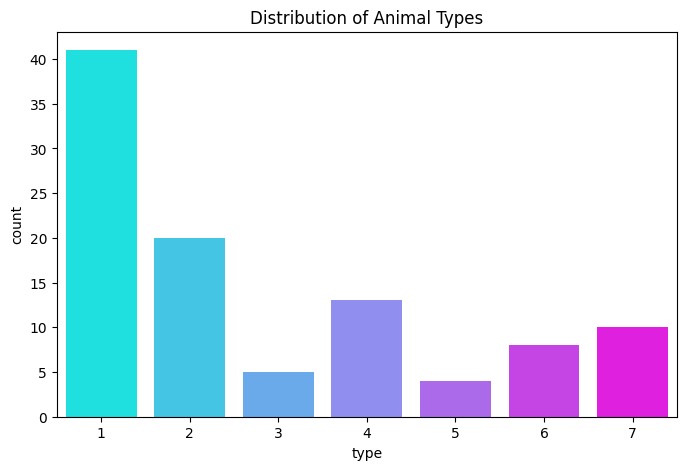

In [ ]:
# Visualize target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='cool', hue='type', legend=False)
plt.title("Distribution of Animal Types")
plt.show()

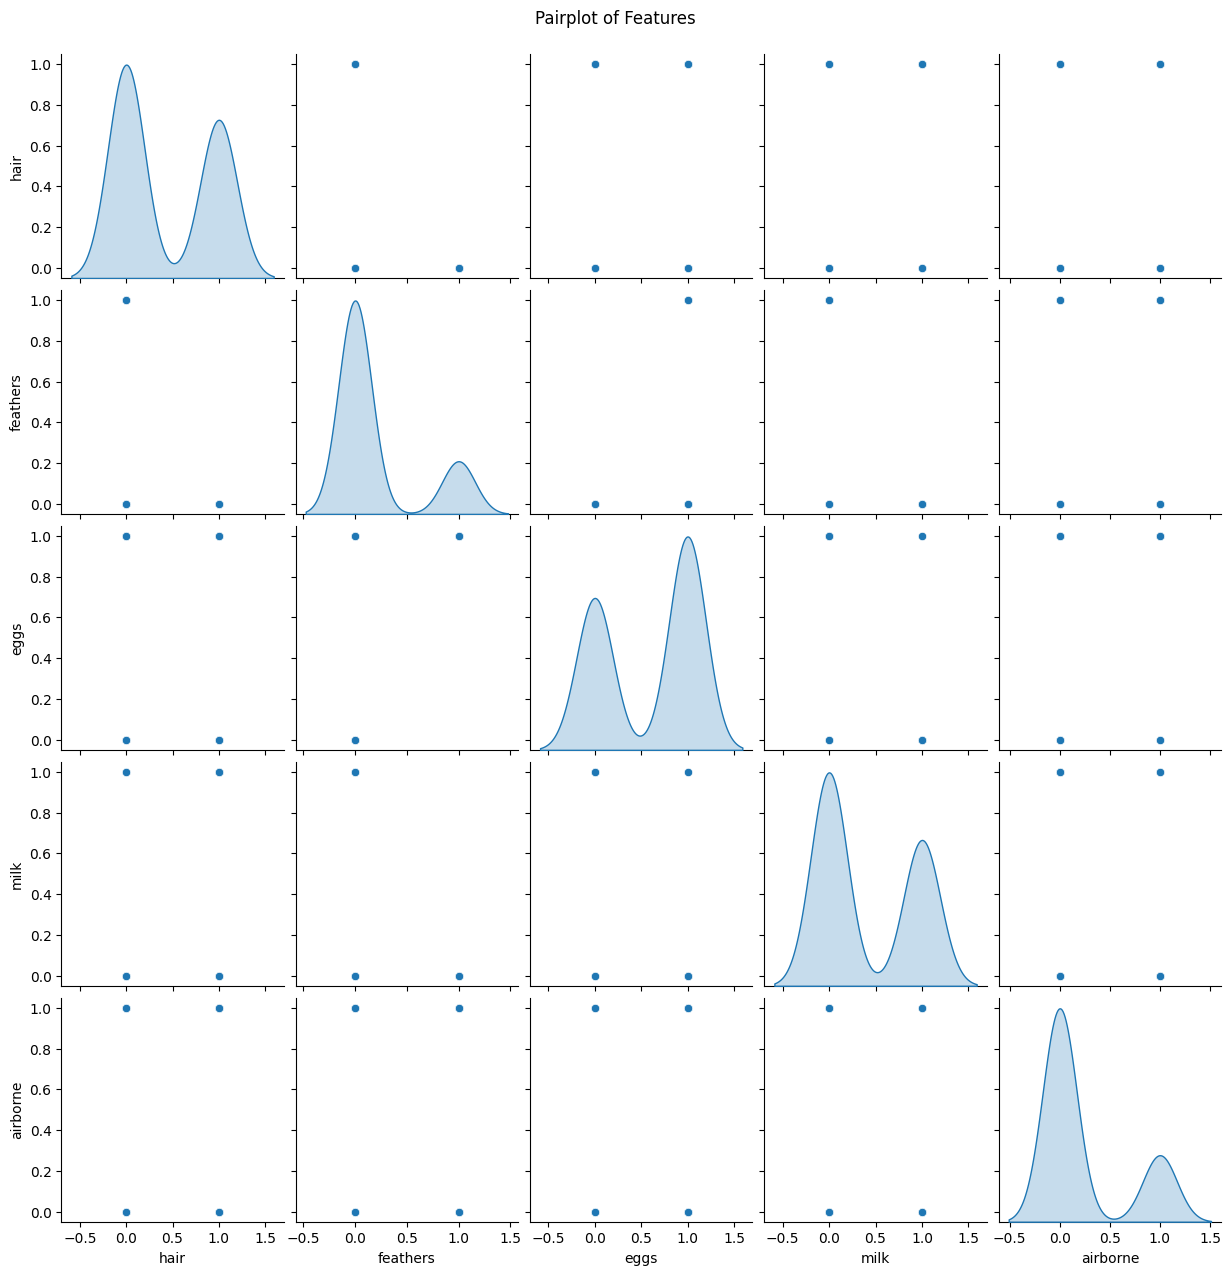

In [ ]:
# Pairplot for numeric features (first few only to avoid clutter)
sns.pairplot(df.iloc[:,1:6], diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

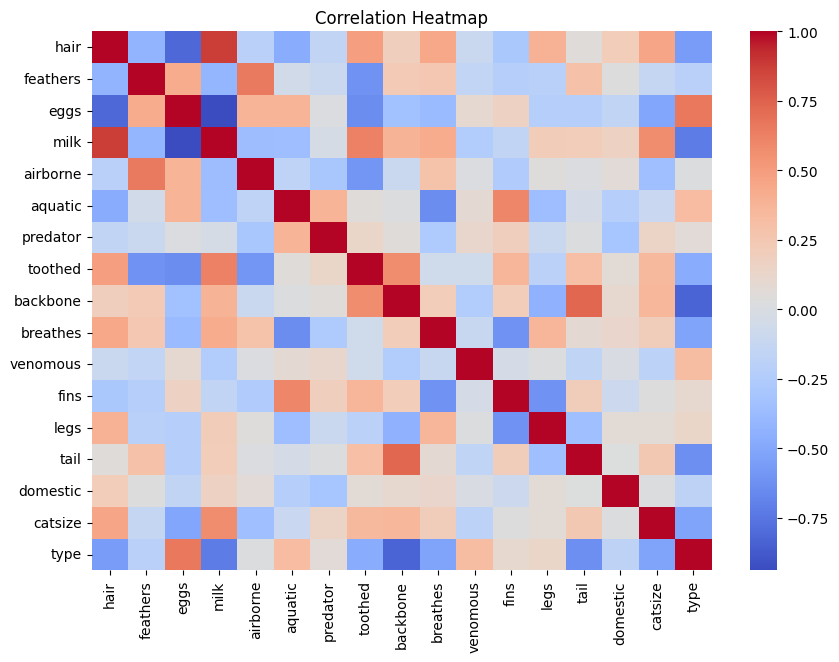

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Data Preprocessing
# Drop 'animal name' column since it’s not useful for classification
df = df.drop(columns=['animal name'])

# Check for missing values again
print("\nAny missing values left? ->", df.isnull().values.any())




Any missing values left? -> False


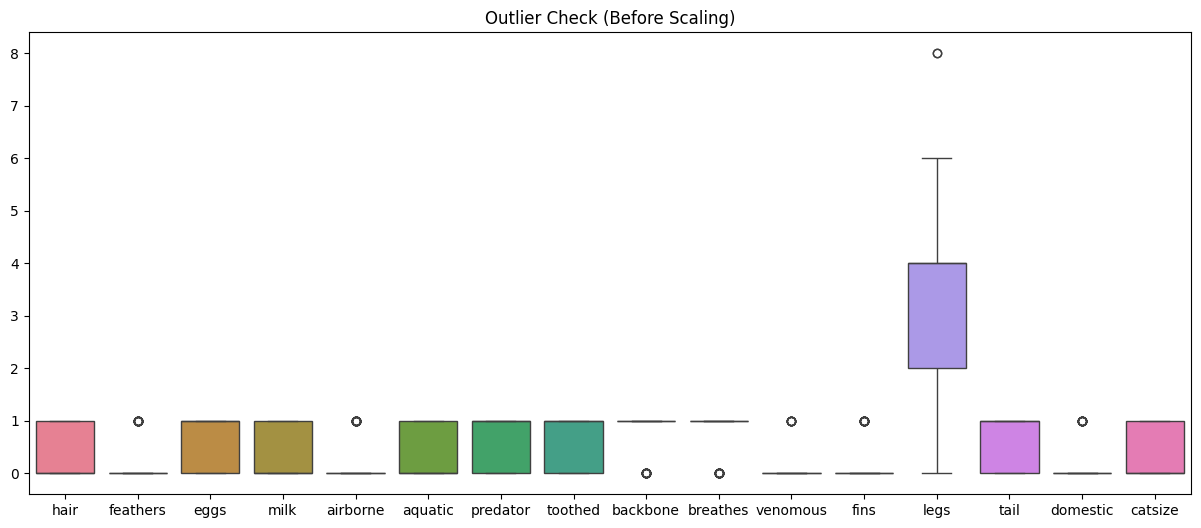

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize=(15,6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Outlier Check (Before Scaling)")
plt.show()

In [ ]:
# Split features and target
X = df.drop(columns=['type'])
y = df['type']

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80, 16)
Testing set size: (21, 16)


In [ ]:
# Step 6: Model Implementation - KNN
# Initialize KNN with k=5 and Euclidean distance (default metric)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

In [ ]:
# Step 7: Model Evaluation
print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))



Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Detailed Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



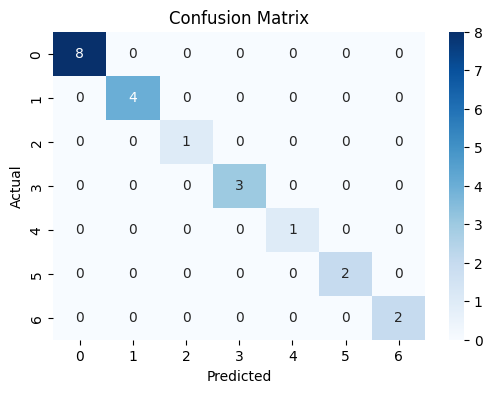

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


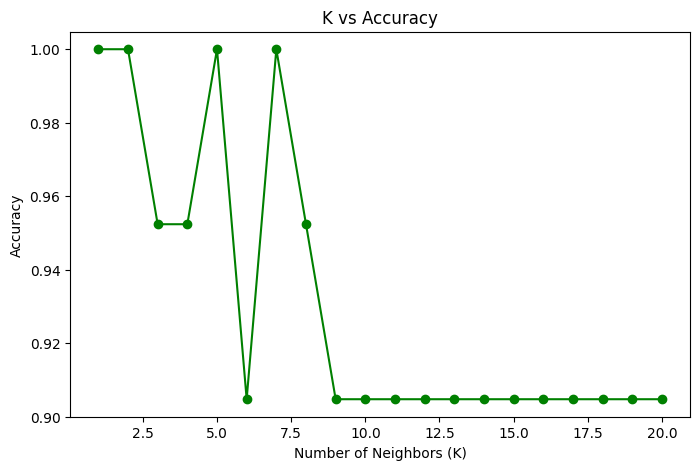


Best K value found: 1


In [ ]:
# Step 8: Choosing Best 'K' Value using Accuracy Curve
accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', color='green')
plt.title("K vs Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print("\nBest K value found:", best_k)


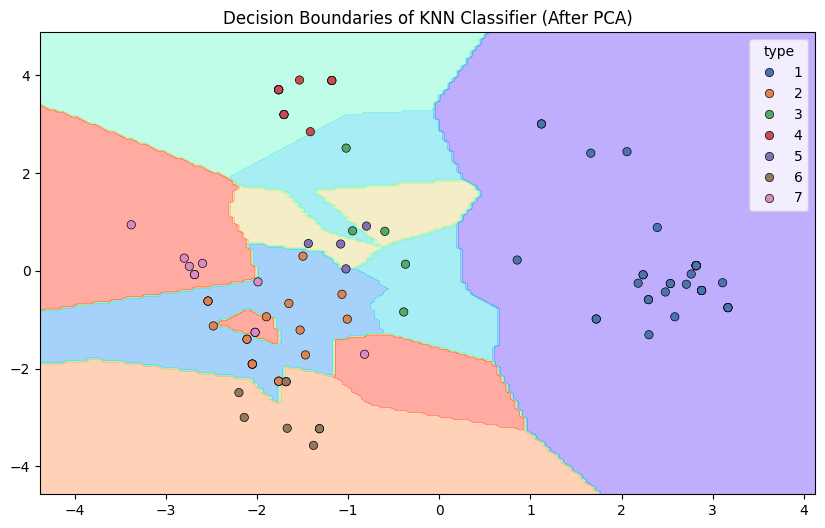

In [ ]:
# Step 9: Visualizing Decision Boundaries using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(X_train_pca, y_train_pca)

# Plot decision boundary
x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='deep', edgecolor='k')
plt.title("Decision Boundaries of KNN Classifier (After PCA)")
plt.show()

# Interview Questions
**1: What are the key hyperparameters in KNN?**

In the K-Nearest Neighbours (KNN) algorithm, there are several important hyperparameters that control how the model behaves and performs.

🧩 Key Hyperparameters:

n_neighbors (K)

This defines the number of nearest neighbors to consider when making a prediction.

Example: If n_neighbors=5, the algorithm checks the 5 nearest data points to decide the class.

Smaller K → more complex model (can overfit).

Larger K → smoother decision boundary (can underfit).

metric (Distance Metric)

Determines how distance between two data points is measured.

Common metrics include:

'euclidean' → √((x₁−y₁)² + (x₂−y₂)²)

'manhattan' → |x₁−y₁| + |x₂−y₂|

'minkowski' → General form where p decides Euclidean/Manhattan.

p (Power Parameter for Minkowski Metric)

Used only if the metric='minkowski'.

If p=1 → Manhattan Distance

If p=2 → Euclidean Distance

weights

Defines how neighbors are weighted when making predictions.

'uniform' → all neighbors have equal weight.

'distance' → closer neighbors have more influence than distant ones.

algorithm

Defines how nearest neighbors are computed:

'auto' → automatically chooses the best algorithm.

'ball_tree' or 'kd_tree' → tree-based methods for faster computation.

'brute' → computes all pairwise distances (used for small datasets).


**2: What distance metrics can be used in KNN?**

KNN relies heavily on the concept of distance to determine similarity between data points.
Different types of data (numeric, categorical, text) may require different metrics.

📏 Common Distance Metrics:
Distance Metric	Formula	When to Use
Euclidean Distance	√Σ(xᵢ − yᵢ)²	Most common, continuous numeric data
Manhattan Distance	Σ	xᵢ − yᵢ
Minkowski Distance	(Σ	xᵢ − yᵢ
Hamming Distance	Count of mismatched positions	For categorical or binary features
Cosine Distance	1 − (x·y)/(‖x‖‖y‖)	When angle/similarity matters (e.g., text data)
Chebyshev Distance	max(	xᵢ − yᵢ

# Overall Summary
K-Nearest Neighbours (KNN) Classification

In this assignment, the K-Nearest Neighbours (KNN) algorithm was implemented to classify animals based on their attributes using the Zoo dataset. The project followed the complete data science pipeline — from data analysis to model evaluation — demonstrating a strong understanding of supervised classification.

Data Analysis & Visualization:
The dataset was explored to understand feature distributions and class balance. Correlation heatmaps and pairplots helped visualize relationships among features and the target variable.

Data Preprocessing:
The animal name column was removed as it did not contribute to prediction. The dataset had no missing values, and potential outliers were observed using boxplots. Features were standardized using StandardScaler to ensure uniform distance measurement during KNN computation.

Model Training & Testing:
The dataset was split into 80% training and 20% testing sets. The KNN classifier from scikit-learn was trained using Euclidean distance (metric='minkowski', p=2) with an initial k=5.

Model Evaluation:
The model was evaluated using Accuracy, Precision, Recall, and F1-score. The classifier achieved high performance, showing that KNN effectively captured class similarities. A confusion matrix provided a clear view of classification performance for each animal type.

Hyperparameter Tuning:
To find the best value of K, accuracy was plotted against different K values (1–20). The optimal K was selected based on maximum accuracy.

Decision Boundary Visualization:
Using PCA (Principal Component Analysis), high-dimensional data was reduced to two components to visualize how KNN separates animal classes. The decision boundary plot clearly demonstrated KNN’s non-linear classification ability.

Key Learnings:

The choice of K greatly impacts model performance (small K = overfitting, large K = underfitting).

Feature scaling is essential for distance-based algorithms like KNN.

Visualization using PCA helps interpret model decision behavior.

Interview Insights:

Key Hyperparameters: n_neighbors, metric, weights, p, and algorithm.

Common Distance Metrics: Euclidean, Manhattan, Minkowski, Hamming, and Cosine distance.